In [0]:
import tensorflow as tf
from tensorflow import keras

In [2]:
cifar10 = keras.datasets.cifar10
(X_train0, y_train0), (X_test0, y_test0) = cifar10.load_data()

print(X_train0.shape, y_train0.shape, X_test0.shape, y_test0.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


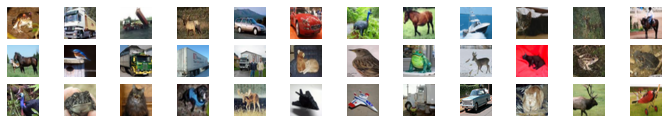

In [3]:
import matplotlib.pylab as plt

plt.figure(figsize=(12, 2))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i])
    plt.axis("off")
plt.show()

In [4]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) uint8


In [5]:
X_train = X_train0.astype('float32') / 255.0
X_test = X_test0.astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [6]:
y_train0[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l2


width = 32
height = 32
channel = 3

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001),
                 input_shape=(width, height, channel), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))



Using TensorFlow backend.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
                 epochs=50,
                 batch_size=32,
                 validation_data=(X_test, Y_test))

Epoch 1/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6613 - accuracy: 0.4007 - val_loss: 1.3206 - val_accuracy: 0.5415
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2248 - accuracy: 0.5746 - val_loss: 1.0370 - val_accuracy: 0.6525
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0719 - accuracy: 0.6370 - val_loss: 0.9569 - val_accuracy: 0.6801
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9809 - accuracy: 0.6742 - val_loss: 0.8767 - val_accuracy: 0.7137
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9198 - accuracy: 0.6975 - val_loss: 0.8372 - val_accuracy: 0.7317
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8824 - accuracy: 0.7130 - val_loss: 0.8245 - val_accuracy: 0.7398
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8575 - accuracy: 0.7261 - val_loss: 0.8030 - val_ac

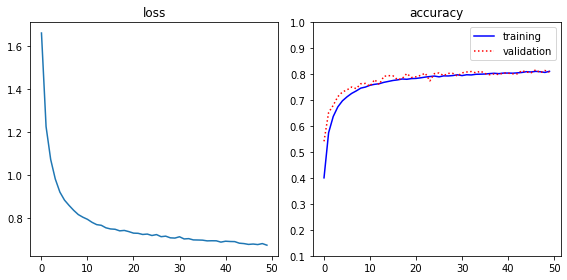

In [12]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.ylim(0.1)
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()